In [1]:
#pip install xgboost

In [2]:
# Importing related libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
import keras
import autokeras as ak
import random
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
from xgboost import XGBClassifier

In [3]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

In [4]:
# Import the dataset
filename = 'norwegian_dataset.csv'
training_data = pd.read_csv(filename, index_col = False)
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [5]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 19., 16.,  4.,  2.,  1., 11., 12., 13., 18.,  3.,
       10.,  9., 15., 17., 22.])

In [6]:
df = training_data
df.loc[df["LITHOLOGY_GEOLINK"] == 9, "LITHOLOGY_GEOLINK"]  = 8
df.loc[df["LITHOLOGY_GEOLINK"] == 10, "LITHOLOGY_GEOLINK"] = 9
df.loc[df["LITHOLOGY_GEOLINK"] == 11, "LITHOLOGY_GEOLINK"]  = 10
df.loc[df["LITHOLOGY_GEOLINK"] == 12, "LITHOLOGY_GEOLINK"] = 11
df.loc[df["LITHOLOGY_GEOLINK"] == 13, "LITHOLOGY_GEOLINK"] = 12
df.loc[df["LITHOLOGY_GEOLINK"] == 15, "LITHOLOGY_GEOLINK"] = 13
df.loc[df["LITHOLOGY_GEOLINK"] == 16, "LITHOLOGY_GEOLINK"] = 14
df.loc[df["LITHOLOGY_GEOLINK"] == 17, "LITHOLOGY_GEOLINK"] = 15
df.loc[df["LITHOLOGY_GEOLINK"] == 18, "LITHOLOGY_GEOLINK"] = 16
df.loc[df["LITHOLOGY_GEOLINK"] == 19, "LITHOLOGY_GEOLINK"] = 17
df.loc[df["LITHOLOGY_GEOLINK"] == 22, "LITHOLOGY_GEOLINK"] = 18
training_data = df
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6.0,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6.0,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6.0,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6.0,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6.0,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1.0,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1.0,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1.0,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1.0,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [7]:
training_data['LITHOLOGY_GEOLINK'].unique()

array([ 6.,  7.,  5., 17., 14.,  4.,  2.,  1., 10., 11., 12., 16.,  3.,
        9.,  8., 13., 15., 18.])

In [8]:
training_data['LITHOLOGY_GEOLINK'] = training_data['LITHOLOGY_GEOLINK'].astype(int)

In [9]:
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,0.709900,2.480200,0.665700,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,0.721212,2.502200,0.669454,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,0.728698,2.473100,0.702844,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,0.727200,2.481300,0.730400,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,0.704400,2.470900,0.677300,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,0.830020,2.334237,0.788812,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,0.858255,2.365948,0.819950,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,0.901830,2.379198,0.866326,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,0.919743,2.360352,0.888828,7/1-2 S,3160.062500


In [10]:
# Convert the deep and medium resistivity to be in a form of Log based 10.
training_data["RDEP"] = np.log10(training_data["RDEP"])
training_data["RMED"] = np.log10(training_data["RMED"])
training_data

,DTC,DTS,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,115.693207,267.867310,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,115.910004,272.334198,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,116.315399,280.204407,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,117.308701,283.573303,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,120.262398,290.746399,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,102.518501,127.078522,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,102.657097,127.074806,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,102.701103,127.075409,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,101.990501,127.065430,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [11]:
# Convert the compressional and shear sonic logs into P- and S-waves velocities, in m/s
training_data['DTC'] = 100000/training_data['DTC']
training_data['DTS'] = 100000/training_data['DTS']
training_data.rename(columns={"DTC": "Vp", "DTS": "Vs"}, inplace = True)
training_data

,Vp,Vs,GR,LITHOLOGY_GEOLINK,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [12]:
# Rename the Facies header from "LITHOLOGY_GEOLINK" into "Facies", for convenience.
training_data.rename(columns = {'LITHOLOGY_GEOLINK':'Facies'}, inplace = True)
training_data

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth
0,864.354985,373.319164,96.910202,6,0.391600,-0.148803,2.480200,-0.176721,15/9-23,2315.461914
1,862.738304,367.195897,108.976501,6,0.391100,-0.141937,2.502200,-0.174280,15/9-23,2315.614502
2,859.731392,356.882324,126.231796,6,0.407800,-0.137453,2.473100,-0.153141,15/9-23,2315.766846
3,852.451690,352.642505,149.429504,6,0.407700,-0.138346,2.481300,-0.136439,15/9-23,2315.919189
4,831.515102,343.942351,163.915497,6,0.426000,-0.152181,2.470900,-0.169219,15/9-23,2316.071533
...,...,...,...,...,...,...,...,...,...,...
184714,975.433690,786.915040,30.631025,1,0.166493,-0.080911,2.334237,-0.103026,7/1-2 S,3159.605469
184715,974.116774,786.938048,32.643269,1,0.176284,-0.066384,2.365948,-0.086213,7/1-2 S,3159.757812
184716,973.699375,786.934316,36.831581,1,0.183089,-0.044875,2.379198,-0.062319,7/1-2 S,3159.910156
184717,980.483463,786.996119,41.760101,1,0.175724,-0.036334,2.360352,-0.051182,7/1-2 S,3160.062500


In [13]:
training_data["WELL"].unique()

array(['15/9-23', '16/10-3 Tyr Central', '16/10-5 Isbjoern',
       '16/2-11 A Johan Sverdrup Appr', '16/2-16', '16/2-6',
       '16/2-7 Johan Sverdrup Appr', '16/5-3 Johan Sverdrup Appr',
       '16/7-6', '25/10-10  Balder Triassic', '25/10-9 Aegis',
       '25/11-19 S  Balder Appr', '25/11-24 Jakob South',
       '25/8-5 S  Jotun', '31/2-19 S', '31/2-21 S', '31/3-4', '32/2-1',
       '33/6-3 S', '34/10-35', '34/11-1', '34/3-1 A', '34/3-2 S',
       '34/3-3 A', '34/4-10 R', '34/5-1 A', '34/5-1 S', '34/6-1',
       '35/11-10', '35/11-11', '35/11-13', '35/11-5', '35/11-6',
       '35/3-7 S', '35/6-2 S', '35/8-6 S', '35/9-10 S', '35/9-2',
       '35/9-5', '35/9-7', '35/9-8', '35/9-9', '7/1-2 S'], dtype=object)

Remove a single well to use as a blind test later. In this case, the blind well is: 15/9-23

In [14]:
blind = training_data[training_data['WELL'] == '25/10-10  Balder Triassic']
training_data = training_data[training_data['WELL'] != '25/10-10  Balder Triassic']

In [15]:
blind['Facies'].unique()

array([6, 5, 7, 4])

In [16]:
training_data['Facies'].unique()

array([ 6,  7,  5, 17, 14,  4,  2,  1, 10, 11, 12, 16,  3,  9,  8, 13, 15,
       18])

In [17]:
training_data['WELL'] = training_data['WELL'].astype('category')

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
# Define facies colors and labels

# 1 = Sandstone, 2 = Silty sand, 3 = Cross Bedded Sst, 4 = Sandy Silt, 5 = Silt
# 6 = Shaly Silt, 7 = Silty Shale, 9 = Chalk, 10 = Porous LST, 11 = LST,
# 12 = Argillaceous Limestone, 13 = Marlstone, 15 = Dolomite, 16 = Calcareous Cement
# 17 = Conglomerate, 18 = Coal, 19 = Cinerite, 22 = Anhydrite

facies_colors = ['#FFFF00','#FDE992','#FFD700','#D2B48C','#FF9999','#FFCC00','#026440',
                 '#3d85c6','#6fa8dc','#9fc5e8','#1e90ff','#00bfff','#44ffff','#36cccc',
                 '#e3b778','#000000', '#227f7f', '#FF77FF']

facies_labels = ['SS', 'SiS', 'CSS', 'SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', 'LS','ALS','M','D','CC',
                 'COM','COAL','CIN','ANH']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ int(row['Facies']) -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1)
training_data.describe()

C:\Users\nandi\anaconda3\envs\tf\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,Depth
count,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000
mean,1106.661636,554.625395,84.603521,7.120582,2.068850,0.441895,2.445272,0.444403,2727.514574
std,352.014203,229.875939,42.531395,3.544087,7.905972,0.455715,0.151514,0.456893,806.463487
min,261.159283,97.222720,0.207500,1.000000,-0.015100,-0.915044,1.244003,-0.927363,1201.265503
25%,947.532465,428.624351,57.623103,5.000000,0.206353,0.152812,2.360203,0.154191,2068.077698
50%,1122.756091,580.014596,80.286850,6.000000,0.282810,0.397062,2.474200,0.406591,2637.434326
75%,1250.394469,678.348782,105.959152,10.000000,0.354700,0.678576,2.558000,0.691040,3224.223145
max,5519.963395,2875.440293,1163.366455,18.000000,61.007858,4.466433,3.217700,4.000000,4981.242676


In [19]:
# A function to plot the facies classes, based on the facies_color and facies_label from the previous cell.

def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster=np.repeat(np.expand_dims(logs['Facies'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=8, figsize=(8, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im=ax[7].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[7])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("Vp")
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("Vs")
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR")
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED")
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB")
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)
    
    # Do the plot code
    f.savefig('facies_log_plot.svg', format='svg', dpi=1200)

For example, plotting Wells 31/2-19 S and 31/2-19 S using the function for plotting facies classes, as seen in the previous cell. 

Also with the features (seven well logs)

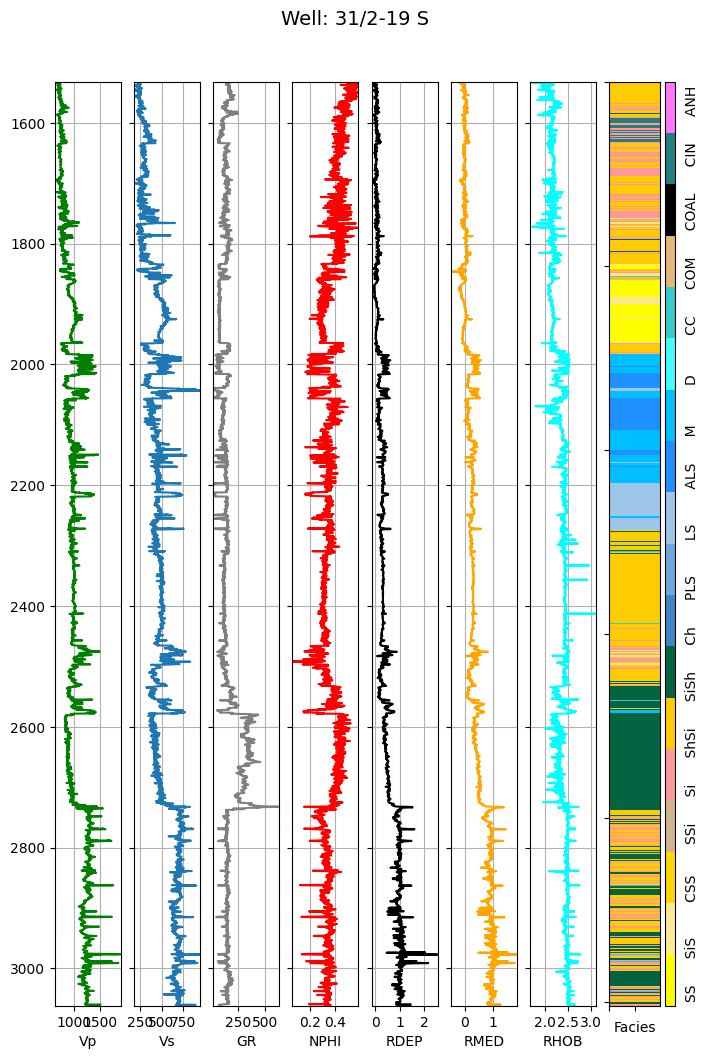

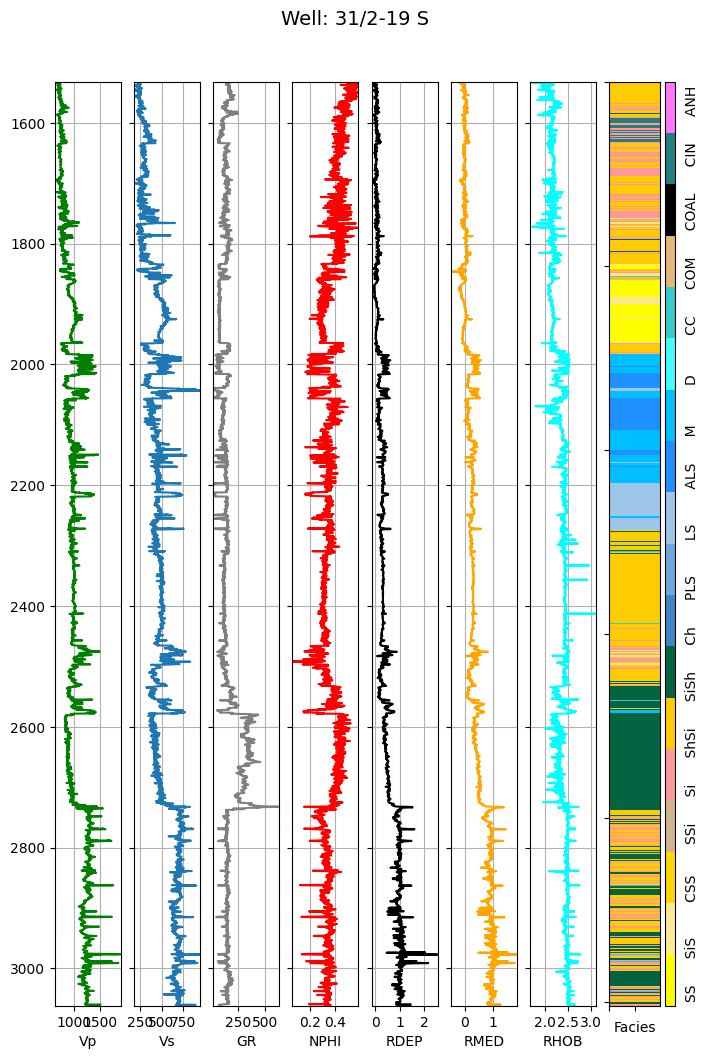

In [20]:
make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

make_facies_log_plot(
    training_data[training_data['WELL'] == '31/2-19 S'],
    facies_colors)

SS       8282
SiS     12448
CSS      4001
SSi      5783
Si      31375
ShSi    36398
SiSh    25752
Ch       3145
PLS      1401
LS      10676
ALS      8567
M       26083
D        2673
CC       2968
COM        44
COAL      322
CIN      2052
ANH       288
Name: Facies, dtype: int64

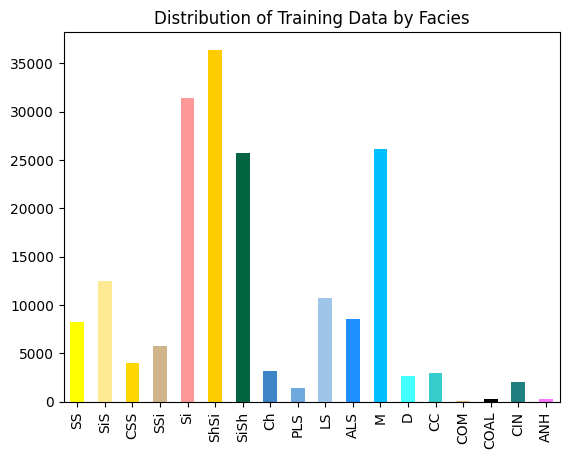

In [21]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

# Conditioning the data set

In [22]:
correct_facies_labels = training_data['Facies'].values

feature_vectors = training_data.drop(['WELL', 'Depth','Facies','FaciesLabels'], axis=1)
feature_vectors.describe()

,Vp,Vs,GR,NPHI,RDEP,RHOB,RMED
count,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000,182258.000000
mean,1106.661636,554.625395,84.603521,2.068850,0.441895,2.445272,0.444403
std,352.014203,229.875939,42.531395,7.905972,0.455715,0.151514,0.456893
min,261.159283,97.222720,0.207500,-0.015100,-0.915044,1.244003,-0.927363
25%,947.532465,428.624351,57.623103,0.206353,0.152812,2.360203,0.154191
50%,1122.756091,580.014596,80.286850,0.282810,0.397062,2.474200,0.406591
75%,1250.394469,678.348782,105.959152,0.354700,0.678576,2.558000,0.691040
max,5519.963395,2875.440293,1163.366455,61.007858,4.466433,3.217700,4.000000


In [23]:
# Perform Standard scaler for the dataset

from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [24]:
df_scaled_feat = pd.DataFrame(scaled_features,columns=['Vp','Vs','GR','NPHI','RDEP_log10','RHOB','RMED_log10'])
df_scaled_feat

,Vp,Vs,GR,NPHI,RDEP_log10,RHOB,RMED_log10
0,-0.688345,-0.788716,0.289356,-0.212150,-1.296204,0.230527,-1.359457
1,-0.692938,-0.815353,0.573060,-0.212214,-1.281139,0.375728,-1.354113
2,-0.701480,-0.860219,0.978768,-0.210101,-1.271298,0.183666,-1.307847
3,-0.722160,-0.878663,1.524196,-0.210114,-1.273259,0.237788,-1.271291
4,-0.781637,-0.916510,1.864792,-0.207799,-1.303617,0.169147,-1.343036
...,...,...,...,...,...,...,...
182253,-0.372793,1.010503,-1.269007,-0.240623,-1.147226,-0.732837,-1.198160
182254,-0.376534,1.010603,-1.221695,-0.239385,-1.115348,-0.523544,-1.161360
182255,-0.377719,1.010587,-1.123219,-0.238524,-1.068150,-0.436094,-1.109064
182256,-0.358447,1.010856,-1.007339,-0.239456,-1.049407,-0.560478,-1.084689


In [25]:
scaled_features

array([[-0.68834528, -0.78871555,  0.28935601, ..., -1.2962045 ,
         0.23052712, -1.35945719],
       [-0.69293795, -0.8153529 ,  0.57306014, ..., -1.28113852,
         0.37572753, -1.35411271],
       [-0.70148   , -0.86021884,  0.9787685 , ..., -1.27129819,
         0.18366595, -1.30784656],
       ...,
       [-0.37771949,  1.01058666, -1.12321901, ..., -1.06815004,
        -0.43609434, -1.10906385],
       [-0.35844724,  1.01085552, -1.00733911, ..., -1.04940668,
        -0.56047787, -1.08468923],
       [-0.2643566 ,  1.01279157, -1.10981613, ..., -1.06667553,
        -0.74077695, -1.09524098]])

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=123)

In [27]:
x_train

array([[-0.06154646, -0.18681326,  0.83134999, ..., -0.71226943,
         0.53545049, -0.62757727],
       [ 0.19494804, -1.56190465,  0.10043147, ...,  0.27797613,
         0.99803229,  0.54896747],
       [ 0.24228843,  0.2814774 , -0.40476278, ..., -0.1478677 ,
        -0.0611955 , -0.14913032],
       ...,
       [-0.26236742, -0.15071751, -0.83169198, ..., -0.56302878,
        -0.79051306, -0.49654331],
       [ 1.07532144,  0.98479446, -1.73430342, ..., -0.14871537,
         0.88722717, -0.13634838],
       [-0.15916253, -0.16570974,  0.11077686, ..., -1.15622135,
        -1.45843115, -1.19204931]])

# Load the results

In [28]:
well_CONV  = pd.read_csv('well25_CONV_facies.csv')
well_FF1   = pd.read_csv('well25_FF1_facies.csv')
well_FF2   = pd.read_csv('well25_FF2_facies.csv')
well_FF3   = pd.read_csv('well25_FF3_facies.csv')
well_FF4   = pd.read_csv('well25_FF4_facies.csv')
well_CNN1  = pd.read_csv('well25_CNN1_facies.csv')
well_CNN2  = pd.read_csv('well25_CNN2_facies.csv')

In [29]:
well_FF1.rename(columns={"Prediction": "Prediction_FF1"}, inplace=True)
well_FF2.rename(columns={"Prediction": "Prediction_FF2"}, inplace=True)
well_FF3.rename(columns={"Prediction": "Prediction_FF3"}, inplace=True)
well_FF4.rename(columns={"Prediction": "Prediction_FF4"}, inplace=True)

well_CNN1.rename(columns={"Prediction": "Prediction_CNN1"}, inplace=True)
well_CNN2.rename(columns={"Prediction": "Prediction_CNN2"}, inplace=True)

In [30]:
well_base = well_CONV

In [31]:
well_base = pd.concat([well_base, well_FF1['Prediction_FF1'], well_FF2['Prediction_FF2'],
                      well_FF3['Prediction_FF3'], well_FF4['Prediction_FF4'], 
                       well_CNN1['Prediction_CNN1'], well_CNN2['Prediction_CNN2']], axis = 1)

In [32]:
well_base

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,Prediction_SVC,Prediction_RFC,Prediction_XGB,Prediction_FF1,Prediction_FF2,Prediction_FF3,Prediction_FF4,Prediction_CNN1,Prediction_CNN2
0,879.734297,531.486884,104.114601,6,0.359786,-0.080658,2.343568,-0.114187,25/10-10 Balder Triassic,2035.807861,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0
1,903.860550,536.892870,95.020187,6,0.307842,-0.080660,2.308728,-0.114187,25/10-10 Balder Triassic,2035.960327,7.0,7.0,7.0,7.0,6.0,7.0,6.0,6.0,6.0
2,929.494319,552.153044,75.242706,5,0.267265,-0.088510,2.278948,-0.099274,25/10-10 Balder Triassic,2036.112671,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,1022.698217,561.439436,50.355732,5,0.255010,-0.258052,2.231838,-0.280654,25/10-10 Balder Triassic,2036.265137,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,981.500565,563.583814,33.667233,5,0.249209,-0.385077,2.223314,-0.380102,25/10-10 Balder Triassic,2036.417481,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,1500.598364,753.585759,74.448921,5,0.120372,0.860046,2.757251,0.864044,25/10-10 Balder Triassic,2486.911865,3.0,5.0,5.0,6.0,3.0,12.0,3.0,5.0,5.0
2457,1339.678627,725.472491,79.685616,5,0.159338,0.885976,2.719760,0.891194,25/10-10 Balder Triassic,2487.064209,5.0,5.0,5.0,5.0,6.0,6.0,5.0,6.0,5.0
2458,1338.209773,686.562767,90.572899,5,0.198400,0.865347,2.684200,0.882314,25/10-10 Balder Triassic,2487.216797,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
2459,1276.740695,665.548550,93.055023,6,0.229350,0.747768,2.649256,0.784358,25/10-10 Balder Triassic,2487.369141,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [33]:
well_base

,Vp,Vs,GR,Facies,NPHI,RDEP,RHOB,RMED,WELL,Depth,Prediction_SVC,Prediction_RFC,Prediction_XGB,Prediction_FF1,Prediction_FF2,Prediction_FF3,Prediction_FF4,Prediction_CNN1,Prediction_CNN2
0,879.734297,531.486884,104.114601,6,0.359786,-0.080658,2.343568,-0.114187,25/10-10 Balder Triassic,2035.807861,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,6.0
1,903.860550,536.892870,95.020187,6,0.307842,-0.080660,2.308728,-0.114187,25/10-10 Balder Triassic,2035.960327,7.0,7.0,7.0,7.0,6.0,7.0,6.0,6.0,6.0
2,929.494319,552.153044,75.242706,5,0.267265,-0.088510,2.278948,-0.099274,25/10-10 Balder Triassic,2036.112671,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,1022.698217,561.439436,50.355732,5,0.255010,-0.258052,2.231838,-0.280654,25/10-10 Balder Triassic,2036.265137,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,981.500565,563.583814,33.667233,5,0.249209,-0.385077,2.223314,-0.380102,25/10-10 Balder Triassic,2036.417481,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,1500.598364,753.585759,74.448921,5,0.120372,0.860046,2.757251,0.864044,25/10-10 Balder Triassic,2486.911865,3.0,5.0,5.0,6.0,3.0,12.0,3.0,5.0,5.0
2457,1339.678627,725.472491,79.685616,5,0.159338,0.885976,2.719760,0.891194,25/10-10 Balder Triassic,2487.064209,5.0,5.0,5.0,5.0,6.0,6.0,5.0,6.0,5.0
2458,1338.209773,686.562767,90.572899,5,0.198400,0.865347,2.684200,0.882314,25/10-10 Balder Triassic,2487.216797,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
2459,1276.740695,665.548550,93.055023,6,0.229350,0.747768,2.649256,0.784358,25/10-10 Balder Triassic,2487.369141,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0


In [34]:
# A function to plot comparison between actual and predicted facies classes, along with its features (seven well logs)

def compare_facies_plot(logs, compadre_0 , compadre_1, compadre_2, compadre_3, compadre_4, compadre_5, compadre_6, 
                        compadre_7, compadre_8, compadre_9, facies_colors, 
                        name_0, name_1, name_2, name_3, name_4, name_5, name_6, name_7, name_8, name_9):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='Depth')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.Depth.min(); zbot=logs.Depth.max()
    
    cluster1  = np.repeat(np.expand_dims(logs[compadre_0].values,1), 100, 1)
    cluster2  = np.repeat(np.expand_dims(logs[compadre_1].values,1), 100, 1) # SVC
    cluster3  = np.repeat(np.expand_dims(logs[compadre_2].values,1), 100, 1) # RF
    cluster4  = np.repeat(np.expand_dims(logs[compadre_3].values,1), 100, 1) # XGB
    cluster5  = np.repeat(np.expand_dims(logs[compadre_4].values,1), 100, 1) # FF1
    cluster6  = np.repeat(np.expand_dims(logs[compadre_5].values,1), 100, 1) # FF2
    cluster7  = np.repeat(np.expand_dims(logs[compadre_6].values,1), 100, 1) # FF3
    cluster8  = np.repeat(np.expand_dims(logs[compadre_7].values,1), 100, 1) # FF3 (should be FF4 later for Well 15)
    cluster9  = np.repeat(np.expand_dims(logs[compadre_8].values,1), 100, 1) # CNN1
    cluster10 = np.repeat(np.expand_dims(logs[compadre_9].values,1), 100, 1) # CNN2

    
    f, ax = plt.subplots(nrows=1, ncols=17, figsize=(25, 12))
    ax[0].plot(logs.Vp, logs.Depth, '-g')
    ax[1].plot(logs.Vs, logs.Depth, '-')
    ax[2].plot(logs.GR, logs.Depth, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.Depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.Depth, '-', color='black')
    ax[5].plot(logs.RMED, logs.Depth, '-', color='orange')
    ax[6].plot(logs.RHOB, logs.Depth, '-', color='cyan')
    im1 = ax[7].imshow(cluster1, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im2  = ax[8].imshow(cluster2, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im3  = ax[9].imshow(cluster3, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im4  = ax[10].imshow(cluster4, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im5  = ax[11].imshow(cluster5, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im6  = ax[12].imshow(cluster6, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im7  = ax[13].imshow(cluster7, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im8  = ax[14].imshow(cluster8, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im9  = ax[15].imshow(cluster9, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    im10 = ax[16].imshow(cluster10, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=18)
    
    divider = make_axes_locatable(ax[16])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im10, cax=cax)
    cbar.set_label((6*' ').join(['SS', 'SiS', '  CSS', ' SSi', 'Si', 'ShSi', 'SiSh','Ch', 'PLS', '  LS','  ALS','M','   D','   CC',
                                 'COM','COAL','CIN','ANH']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-10):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    fontsize_a = 14
    fontsize_b = 10
    ax[0].set_ylabel("Depth (m)"   , fontsize=fontsize_a)
    ax[0].set_xlabel("$V_p$\n(m/s)", fontsize=fontsize_a)
    ax[0].set_xlim(logs.Vp.min(),logs.Vp.max())
    ax[1].set_xlabel("$V_s$\n(m/s)", fontsize=fontsize_a)
    ax[1].set_xlim(logs.Vs.min(),logs.Vs.max())
    ax[2].set_xlabel("GR\n(gAPI)", fontsize=fontsize_a)
    ax[2].set_xlim(logs.GR.min(),logs.GR.max())
    ax[3].set_xlabel("NPHI", fontsize=fontsize_a)
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("RDEP\nlog10($\u03A9$m)" , fontsize=fontsize_a-2)
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())
    ax[5].set_xlabel("RMED\nlog10($\u03A9$m)" , fontsize=fontsize_a-2)
    ax[5].set_xlim(logs.RMED.min(),logs.RMED.max())
    ax[6].set_xlabel("RHOB\n(g/cc)", fontsize=fontsize_a)
    ax[6].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[7].set_xlabel(name_0, fontsize=fontsize_a)
    ax[8].set_xlabel(name_1, fontsize=fontsize_a)
    ax[9].set_xlabel(name_2, fontsize=fontsize_a)
    ax[10].set_xlabel(name_3, fontsize=fontsize_a)
    ax[11].set_xlabel(name_4, fontsize=fontsize_b)
    ax[12].set_xlabel(name_5, fontsize=fontsize_b)
    ax[13].set_xlabel(name_6, fontsize=fontsize_b)
    ax[14].set_xlabel(name_7, fontsize=fontsize_b)
    ax[15].set_xlabel(name_8, fontsize=fontsize_b)
    ax[16].set_xlabel(name_9, fontsize=fontsize_b)
    
#     ax[0].set_xticklabels(ax[0].get_xticks(), rotation = 90);
    fontsize_label = 9
    ax[0].xaxis.set_tick_params(labelsize=fontsize_label)
    ax[1].xaxis.set_tick_params(labelsize=fontsize_label)
    ax[2].xaxis.set_tick_params(labelsize=fontsize_label)
    ax[3].xaxis.set_tick_params(labelsize=fontsize_label)
    ax[4].xaxis.set_tick_params(labelsize=fontsize_label)
    ax[5].xaxis.set_tick_params(labelsize=fontsize_label)
    ax[6].xaxis.set_tick_params(labelsize=fontsize_label)
    
    ax[1].set_yticklabels([]);
    ax[2].set_yticklabels([]); # ax[2].set_xlim([100,200])
    ax[3].set_yticklabels([]);
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([]);
    ax[7].set_yticklabels([]); ax[7].set_xticklabels([])
    ax[8].set_xticklabels([]); ax[8].set_yticklabels([])
    ax[9].set_xticklabels([]); ax[9].set_yticklabels([]); 
    ax[10].set_xticklabels([]); ax[10].set_yticklabels([]);
    ax[11].set_xticklabels([]); ax[11].set_yticklabels([]);
    ax[12].set_xticklabels([]); ax[12].set_yticklabels([]);
    ax[13].set_xticklabels([]); ax[13].set_yticklabels([]);
    ax[14].set_xticklabels([]); ax[14].set_yticklabels([]);
    ax[15].set_xticklabels([]); ax[15].set_yticklabels([]);
    ax[16].set_xticklabels([]); ax[16].set_yticklabels([]);
    f.suptitle('(B) Well: %s'%logs.iloc[0]['WELL'], fontsize=20,y=0.94)
    
    # Do the plot code
    f.savefig('well25_facies.png', format='png', dpi=600)

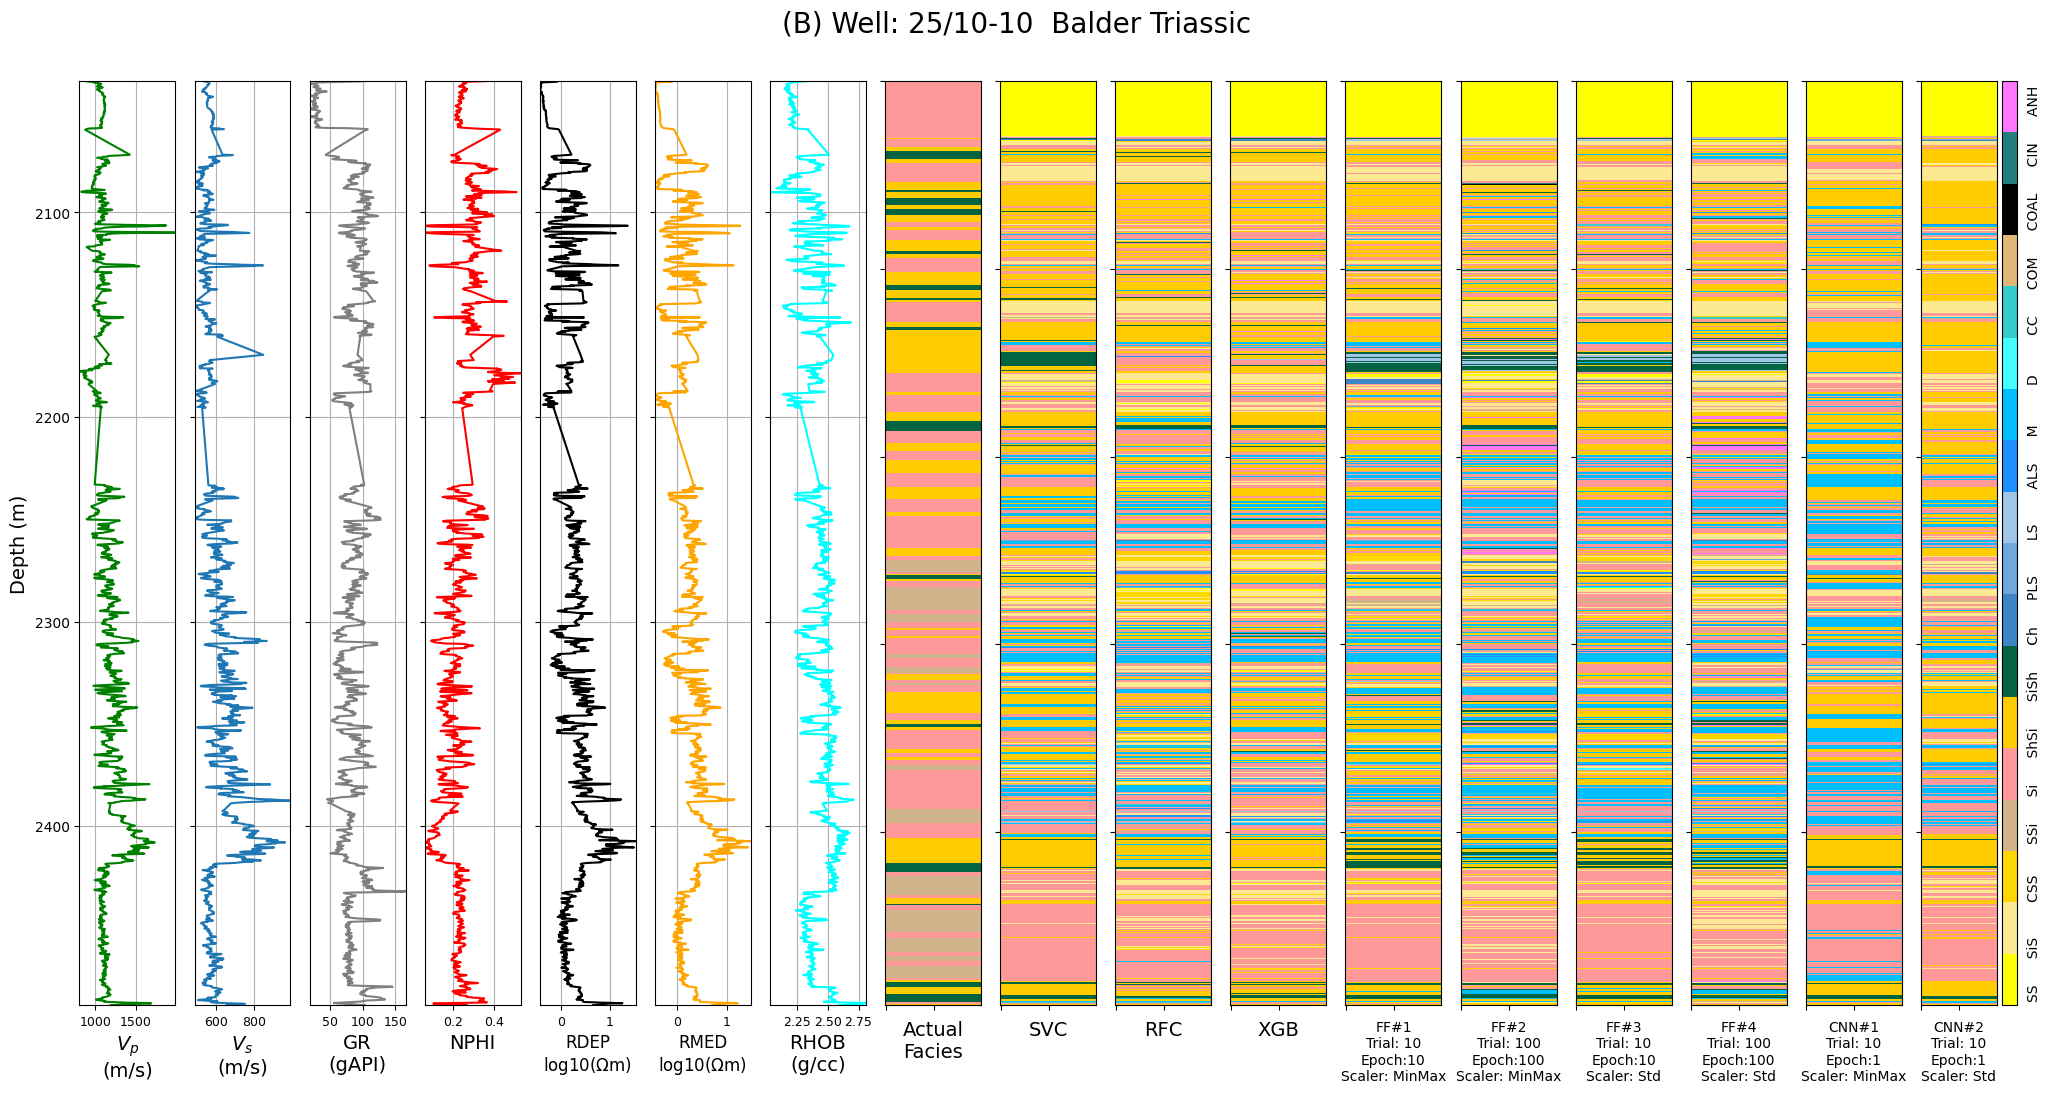

In [35]:
# compare_facies_plot(well_base, 'Facies', 'Prediction_SVC', 'Prediction_RFC', 'Prediction_XGB', 'Prediction_FF1', 'Prediction_FF2', 
#                     'Prediction_FF3', 'Prediction_FF4', 'Prediction_CNN1', 'Prediction_CNN2', facies_colors,
#                     'Actual\nFacies', 'SVC', 'RFC', 'XGB', 'FF#1', 'FF#2', 'FF#3', 'FF#4', 'CNN#1', 'CNN#2')

compare_facies_plot(well_base, 'Facies', 'Prediction_SVC', 'Prediction_RFC', 'Prediction_XGB', 'Prediction_FF1', 'Prediction_FF2', 
                    'Prediction_FF3', 'Prediction_FF4', 'Prediction_CNN1', 'Prediction_CNN2', facies_colors,
                    'Actual\nFacies', 'SVC', 'RFC', 'XGB', 
                    'FF#1\nTrial: 10\nEpoch:10\nScaler: MinMax', 
                    'FF#2\nTrial: 100\nEpoch:100\nScaler: MinMax',
                    'FF#3\nTrial: 10\nEpoch:10\nScaler: Std', 
                    'FF#4\nTrial: 100\nEpoch:100\nScaler: Std',
                    'CNN#1\nTrial: 10\nEpoch:1\nScaler: MinMax',
                    'CNN#2\nTrial: 10\nEpoch:1\nScaler: Std')

In [36]:
# # The confusion matrix helps visualize the performance of the algorithm.
# cm = metrics.confusion_matrix(blind['Facies'], blind['Prediction_SVC'])

# # compute and print accuracy score
# print('Blind test accuracy score is: {0:0.4f}'. format(accuracy_score(blind['Facies'], blind['Prediction_SVC'])))